In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng(12345)

y = rng.normal(5, 2, 100)

In [4]:
y_mc = np.sum(y)/y.shape[0]

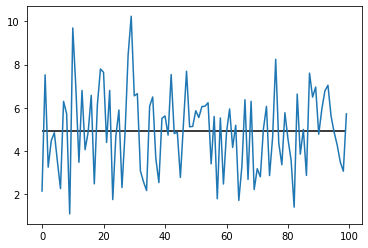

In [5]:
plt.plot(y)
plt.hlines(y_mc, 0, 99)

In [6]:
def online_estimator(measurement, time, prev_estimation=0):
    return prev_estimation + (1/(time+1))*(measurement-prev_estimation)

In [7]:
y_online = np.zeros_like(y)
for i in range(y.shape[0]):
    if i == 0:
        y_online[i] = online_estimator(y[i], i)
    else:
        y_online[i] = online_estimator(y[i], i, y_online[i-1])

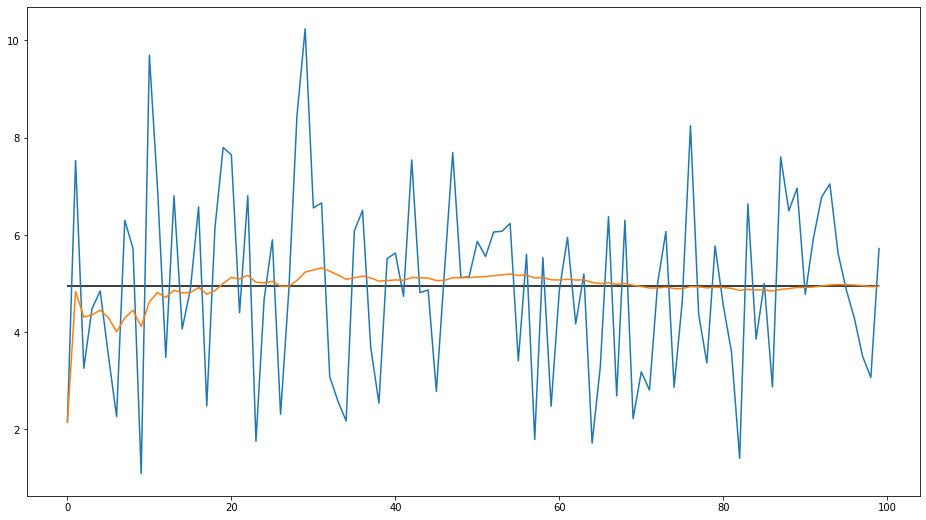

In [9]:
plt.figure(figsize=(16, 9))
plt.plot(y)
plt.hlines(y_mc, 0, 99)
plt.plot(y_online)

In [10]:
y_online[-1]

4.943584433654483

------------

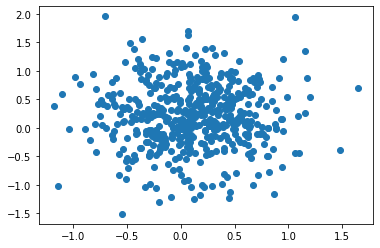

In [11]:
means = np.array([0.1, 0.2])
cov = np.diag([0.2, 0.3])

asset_returns = rng.multivariate_normal(means, cov, 500)

plt.scatter(asset_returns[:, 0], asset_returns[:, 1])

In [12]:
w = np.linspace(0, 1, 100)

In [13]:
W = np.array([w, 1-w])

portafolio_returns = asset_returns @ W

In [14]:
portafolio_ret = np.mean(portafolio_returns, axis=0)
portafolio_sigma = np.std(portafolio_returns, axis=0)

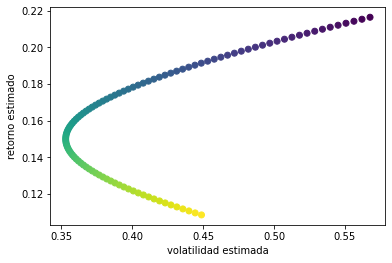

In [21]:
plt.scatter(portafolio_sigma, portafolio_ret, c=w)
plt.xlabel('volatilidad estimada');
plt.ylabel('retorno estimado');

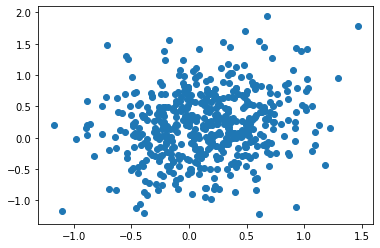

In [53]:
means = np.array([0.1, 0.2])
vars = [0.2, 0.3] # varianzas
rho = 0.85 # correlation

cov = np.eye(2) * vars + np.fliplr(np.eye(2)) * rho * np.prod(vars)

asset_returns = rng.multivariate_normal(means, cov, 500)

plt.scatter(asset_returns[:, 0], asset_returns[:, 1])

In [54]:
portafolio_returns = asset_returns @ W

portafolio_ret = np.mean(portafolio_returns, axis=0)
portafolio_sigma = np.std(portafolio_returns, axis=0)

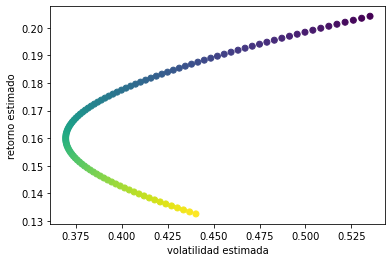

In [55]:
plt.scatter(portafolio_sigma, portafolio_ret, c=w)
plt.xlabel('volatilidad estimada');
plt.ylabel('retorno estimado');